In [1]:
import nltk
import pandas as pd
from collections import Counter
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

/Users/salonibirthare/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
nltk.download('inaugural')
from nltk.corpus import inaugural

[nltk_data] Downloading package inaugural to
[nltk_data]     /Users/salonibirthare/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [3]:
print("Inaugural corpus file IDs:")
print(inaugural.fileids())

Inaugural corpus file IDs:
['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '19

In [4]:
Obama = inaugural.raw('2013-Obama.txt')
print(Obama)

Thank you. Thank you so much.

Vice President Biden, Mr. Chief Justice, Members of the United States Congress, distinguished guests, and fellow citizens:

Each time we gather to inaugurate a President we bear witness to the enduring strength of our Constitution. We affirm the promise of our democracy. We recall that what binds this Nation together is not the colors of our skin or the tenets of our faith or the origins of our names. What makes us exceptionalâwhat makes us Americanâis our allegiance to an idea articulated in a declaration made more than two centuries ago:

We hold these truths to be self-evident, that all men are created equal; that they are endowed by their Creator with certain unalienable rights; that among these are life, liberty, and the pursuit of happiness.

Today we continue a never-ending journey to bridge the meaning of those words with the realities of our time. For history tells us that while these truths may be self-evident, they've never been self-execut

In [5]:
file_ids = inaugural.fileids()

In [6]:
party_affiliations = {
    'Washington': 'Other',     
    'Adams': 'Other',          
    'Jefferson': 'Other',      
    'Madison': 'Other',        
    'Monroe': 'Other',        
    'Jackson': 'Democrat',
    'Vanburen': 'Democrat',
    'Harrison': 'Other',       
    'Polk': 'Democrat',
    'Taylor': 'Other',         
    'Pierce': 'Democrat',
    'Buchanan': 'Democrat',
    'Lincoln': 'Republican',
    'Grant': 'Republican',
    'Hayes': 'Republican',
    'Garfield': 'Republican',
    'Cleveland': 'Democrat',
    'Mckinley': 'Republican',
    'Roosevelt': 'Republican', 
    'Taft': 'Republican',
    'Wilson': 'Democrat',
    'Harding': 'Republican',
    'Coolidge': 'Republican',
    'Hoover': 'Republican',
    'Roosevelt': 'Democrat',   
    'Truman': 'Democrat',
    'Eisenhower': 'Republican',
    'Kennedy': 'Democrat',
    'Johnson': 'Democrat',
    'Nixon': 'Republican',
    'Carter': 'Democrat',
    'Reagan': 'Republican',
    'Bush': 'Republican',     
    'Clinton': 'Democrat',
    'Bush': 'Republican',     
    'Obama': 'Democrat',
    'Trump': 'Republican',
    'Biden': 'Democrat'
}


In [7]:
data = []
for file_id in file_ids:
    year = int(file_id[:4]) 
    president_name = file_id.split('-')[1].replace('.txt', '')  
    party = party_affiliations.get(president_name, 'Other')  
    speech_text = inaugural.raw(file_id)  
    
    data.append([president_name, year, party, speech_text])

In [9]:
df = pd.DataFrame(data, columns=['President', 'Year', 'Party', 'Speech'])
df

df.to_csv('inaugural_speeches_corpus.csv', index=False)

In [10]:
df

,President,Year,Party,Speech
0,Washington,1789,Other,Fellow-Citizens of the Senate and of the House...
1,Washington,1793,Other,"Fellow citizens, I am again called upon by the..."
2,Adams,1797,Other,"When it was first perceived, in early times, t..."
3,Jefferson,1801,Other,Friends and Fellow Citizens:\n\nCalled upon to...
4,Jefferson,1805,Other,"Proceeding, fellow citizens, to that qualifica..."
5,Madison,1809,Other,Unwilling to depart from examples of the most ...
6,Madison,1813,Other,About to add the solemnity of an oath to the o...
7,Monroe,1817,Other,I should be destitute of feeling if I was not ...
8,Monroe,1821,Other,"Fellow citizens, I shall not attempt to descri..."
9,Adams,1825,Other,In compliance with an usage coeval with the ex...


### Q1. Which president has the most vocabulary as evident from their inaugural speeches, and which president has the least vocabulary? On average, do Democratic, Republican, or Other presidents have higher vocabulary?

In [11]:
from nltk.tokenize import word_tokenize
def calculate_vocabulary_size(speech_text):
    words = word_tokenize(speech_text)
    words = [word.lower() for word in words if word.isalpha()]
    return len(set(words))

In [12]:
df['Vocabulary_Size'] = df['Speech'].apply(calculate_vocabulary_size)

In [13]:
most_vocab_president = df.loc[df['Vocabulary_Size'].idxmax()]

least_vocab_president = df.loc[df['Vocabulary_Size'].idxmin()]

avg_vocab_by_party = df.groupby('Party')['Vocabulary_Size'].mean()

print(f"\nPresident with the most vocabulary: {most_vocab_president['President']} ({most_vocab_president['Year']}) with {most_vocab_president['Vocabulary_Size']} unique words.")
print(f"President with the least vocabulary: {least_vocab_president['President']} ({least_vocab_president['Year']}) with {least_vocab_president['Vocabulary_Size']} unique words.")
print("\nAverage vocabulary size by party affiliation:")
print(avg_vocab_by_party)


President with the most vocabulary: Harrison (1841) with 1794 unique words.
President with the least vocabulary: Washington (1793) with 90 unique words.

Average vocabulary size by party affiliation:
Party
Democrat      660.434783
Other         865.687500
Republican    775.350000
Name: Vocabulary_Size, dtype: float64


### Q2 Create a barplot of presidential vocabulary from the earliest president (Washington) to the latest (Biden) in chronological order. Color code this barplot as blue for Democrat, red for Republican, and gray for Others.

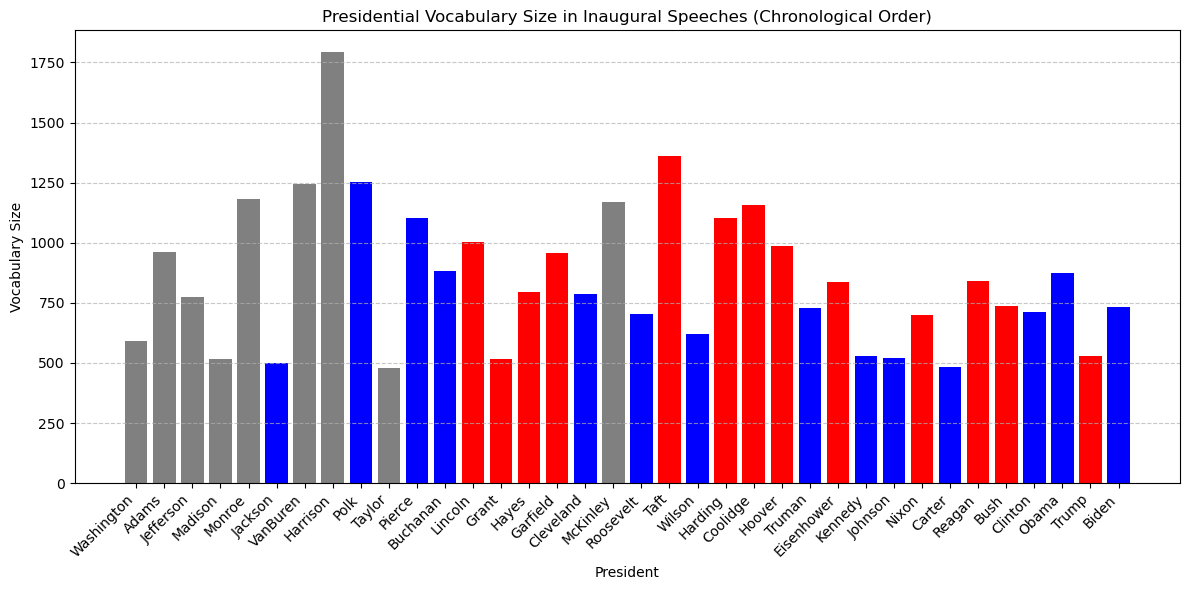

In [14]:
df_sorted = df.sort_values(by='Year')

color_map = {
    'Democrat': 'blue',
    'Republican': 'red',
    'Other': 'gray'
}

plt.figure(figsize=(12, 6))
plt.bar(df_sorted['President'], df_sorted['Vocabulary_Size'], color=[color_map[party] for party in df_sorted['Party']])
plt.xticks(rotation=45, ha='right')
plt.title('Presidential Vocabulary Size in Inaugural Speeches (Chronological Order)')
plt.xlabel('President')
plt.ylabel('Vocabulary Size')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


### Q3: What are the five most frequently used words (exclusive of stop words) used by each president? What are the five most frequently words used collectively by all Democratic presidents versus Republican presidents?

In [15]:
nltk.download('punkt')
nltk.download('stopwords')

def most_common_words(df):
    stop_words = set(stopwords.words('english'))
    president_words = {}
    party_words = {'Democrat': [], 'Republican': []}

    for index, speech_row in df.iterrows():
        
        tokenized_words = word_tokenize(speech_row['Speech'])
        
        filtered_words = [word.lower() for word in tokenized_words if word.isalpha() and word.lower() not in stop_words]

        president_words[speech_row['President']] = Counter(filtered_words).most_common(5)

        if speech_row['Party'] in party_words:
            party_words[speech_row['Party']].extend(filtered_words)

    party_most_common = {party: Counter(words).most_common(5) for party, words in party_words.items()}

    return president_words, party_most_common


president_common_words, party_common_words = most_common_words(df)
president_common_words_df = pd.DataFrame(president_common_words)

print("Five Most Frequently Used Words by Each President:")
print(president_common_words_df)

print("\nFive Most Frequently Used Words for Democratic Presidents:", party_common_words['Democrat'])
print("\nFive Most Frequently Used Words for Republican Presidents:", party_common_words['Republican'])


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/salonibirthare/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/salonibirthare/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Five Most Frequently Used Words by Each President:
      Washington             Adams       Jefferson       Madison  \
0     (shall, 3)       (union, 20)    (public, 14)     (war, 15)   
1      (oath, 2)  (government, 17)  (citizens, 10)  (country, 5)   
2    (fellow, 1)        (upon, 16)       (may, 10)   (united, 5)   
3  (citizens, 1)     (country, 10)     (fellow, 8)    (every, 5)   
4    (called, 1)      (rights, 10)      (state, 8)  (british, 5)   

         Monroe           Jackson            VanBuren      Harrison  \
0   (great, 29)  (government, 13)        (people, 20)  (people, 29)   
1  (states, 20)       (people, 9)         (every, 20)    (upon, 21)   
2   (would, 18)        (union, 9)  (institutions, 16)  (states, 20)   
3  (united, 16)       (states, 8)       (country, 15)   (shall, 18)   
4     (war, 16)         (upon, 5)    (government, 15)  (public, 17)   

               Polk             Taylor  ...     Kennedy       Johnson  \
0  (government, 45)        (shall, 15)  

### Q4. What are the key themes (e.g., freedom, liberty, country, etc.) used by each president in their inaugural speech?

In [16]:
from textblob import TextBlob
from collections import Counter

def extract_themes_from_speech(speech):
    blob = TextBlob(speech)
    nouns = list()

    # Extract nouns from the speech
    for word, tag in blob.tags:
        if tag in ['NN']:  
            nouns.append(word.lemmatize())

    return nouns

def key_themes_by_president(df):
    themes_by_president = {}

    for index, row in df.iterrows():
        president = row['President']
        speech = row['Speech']
        themes = extract_themes_from_speech(speech)

        
        theme_count = Counter(themes)
        top_themes = theme_count.most_common(3)

        themes_by_president[president] = [theme for theme, _ in top_themes]  # Store only themes

    return themes_by_president

presidential_themes = key_themes_by_president(df)

for president, themes in presidential_themes.items():
    print(f"\nKey themes for {president}:")
    print("  - " + "\n  - ".join(themes))  


Key themes for Washington:
  - oath
  - upon
  - voice

Key themes for Adams:
  - country
  - peace
  - nation

Key themes for Jefferson:
  - time
  - state
  - reason

Key themes for Madison:
  - war
  - country
  - nation

Key themes for Monroe:
  - war
  - commerce
  - force

Key themes for Jackson:
  - liberty
  - preservation
  - confidence

Key themes for VanBuren:
  - country
  - experience
  - power

Key themes for Harrison:
  - nation
  - policy
  - duty

Key themes for Polk:
  - country
  - revenue
  - protection

Key themes for Taylor:
  - country
  - office
  - day

Key themes for Pierce:
  - power
  - nation
  - right

Key themes for Buchanan:
  - question
  - country
  - power

Key themes for Lincoln:
  - war
  - nation
  - interest

Key themes for Grant:
  - country
  - office
  - subject

Key themes for Hayes:
  - country
  - government
  - party

Key themes for Garfield:
  - law
  - nation
  - authority

Key themes for Cleveland:
  - service
  - power
  - confidence



### Q5. Compute a sentiment (positive/negative) for each presidential speech, and draw a barplot of the sentiment of all presidential speeches in chronological order. Again, color code the speeches as blue for Democrat, red for Republican, and gray for Other. Which of these groups have higher mean sentiment score? Who are the top three presidents with the highest positive sentiment in each group?

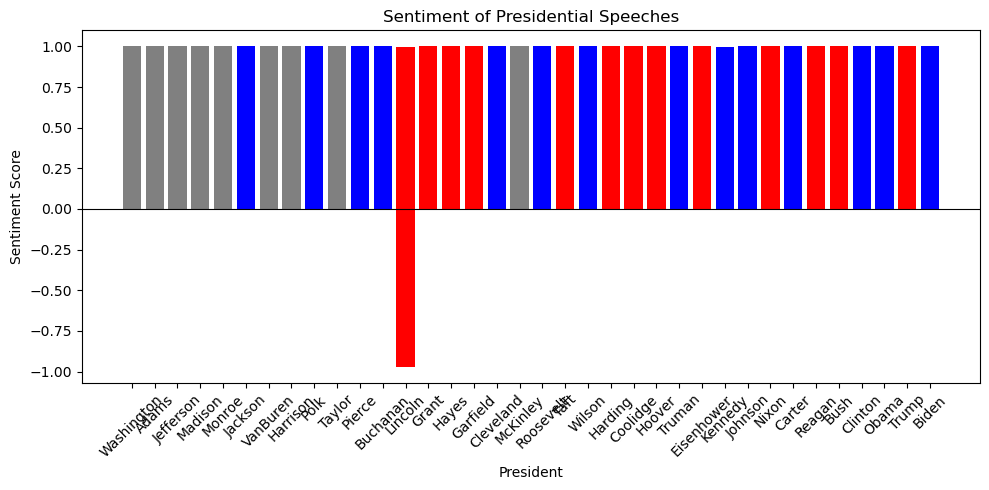


Mean Sentiment Scores by Party:
Party
Democrat      0.999617
Other         0.985137
Republican    0.901255
Name: Sentiment, dtype: float64

Top 3 Presidents with Highest Positive Sentiment:

Other Presidents:
  President  Sentiment
2     Adams        1.0
7    Monroe        1.0
8    Monroe        1.0

Democrat Presidents:
   President  Sentiment
40    Truman        1.0
14      Polk        1.0
16    Pierce        1.0

Republican Presidents:
     President  Sentiment
41  Eisenhower        1.0
54        Bush        1.0
22       Hayes        1.0


In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

df['Sentiment'] = df['Speech'].apply(lambda speech: analyzer.polarity_scores(speech)['compound'])


plt.figure(figsize=(10, 5))
plt.bar(df['President'], df['Sentiment'], color=['gray' if party == 'Other' else 'blue' if party == 'Democrat' else 'red' for party in df['Party']])
plt.title('Sentiment of Presidential Speeches')
plt.xlabel('President')
plt.ylabel('Sentiment Score')
plt.axhline(0, color='black', linewidth=0.8)  
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()

mean_sentiment = df.groupby('Party')['Sentiment'].mean()
print("\nMean Sentiment Scores by Party:")
print(mean_sentiment)

top_positive_presidents = {}
for party in df['Party'].unique():
    top_presidents = df[df['Party'] == party].sort_values(by='Sentiment', ascending=False).head(3)
    top_positive_presidents[party] = top_presidents[['President', 'Sentiment']]

print("\nTop 3 Presidents with Highest Positive Sentiment:")
for party, presidents in top_positive_presidents.items():
    print(f"\n{party} Presidents:")
    print(presidents)



Mean Sentiment Scores by Party:
Party
Democrat      0.154297
Other         0.164290
Republican    0.168983
Name: Sentiment, dtype: float64

Top 3 Presidents with Highest Positive Sentiment:

Other Presidents:
   President  Sentiment
7     Monroe   0.253597
3  Jefferson   0.235479
5    Madison   0.217476

Democrat Presidents:
   President  Sentiment
32    Wilson   0.212831
44   Johnson   0.209227
47    Carter   0.206482

Republican Presidents:
   President  Sentiment
46     Nixon   0.231718
20     Grant   0.213383
21     Grant   0.206539


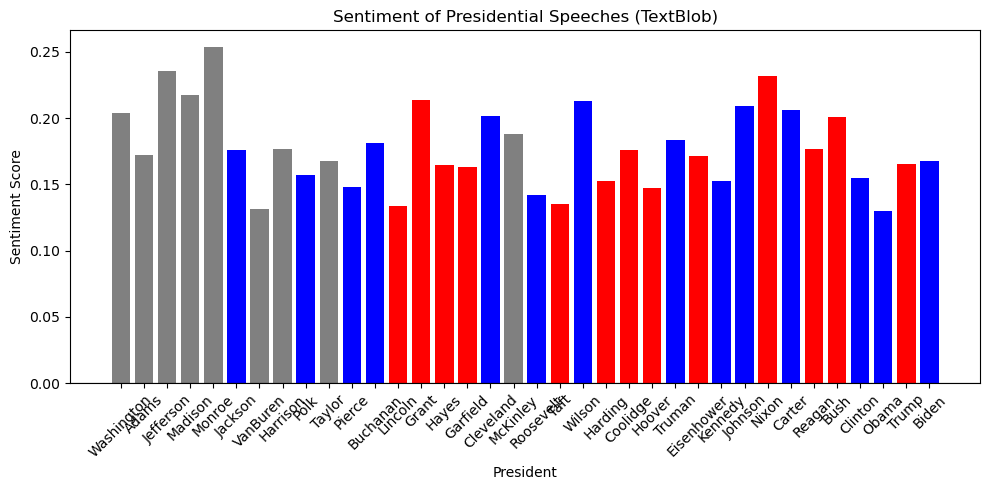

In [18]:
df['Sentiment'] = df['Speech'].apply(lambda speech: TextBlob(speech).sentiment.polarity)

# Calculate mean sentiment score by party
mean_sentiment_by_party = df.groupby('Party')['Sentiment'].mean()

print("\nMean Sentiment Scores by Party:")
print(mean_sentiment_by_party)

# Find top 3 presidents with the highest positive sentiment for each party
def top_3_presidents_by_party(df, party):
    return df[df['Party'] == party].nlargest(3, 'Sentiment')[['President', 'Sentiment']]

print("\nTop 3 Presidents with Highest Positive Sentiment:")

print("\nOther Presidents:")
print(top_3_presidents_by_party(df, 'Other'))

print("\nDemocrat Presidents:")
print(top_3_presidents_by_party(df, 'Democrat'))

print("\nRepublican Presidents:")
print(top_3_presidents_by_party(df, 'Republican'))

# Bar plot for sentiment scores
plt.figure(figsize=(10, 5))
plt.bar(df['President'], df['Sentiment'], color=['gray' if party == 'Other' else 'blue' if party == 'Democrat' else 'red' for party in df['Party']])
plt.title('Sentiment of Presidential Speeches (TextBlob)')
plt.xlabel('President')
plt.ylabel('Sentiment Score')
plt.axhline(0, color='black', linewidth=0.8)  # Line at y=0 for reference
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.tight_layout()  # Adjust layout for better spacing
plt.show()
